# Import libraries

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
from pybaseball import batting_stats
from pybaseball import pitching_stats
from pybaseball import schedule_and_record

In [3]:
# Batting Stats , qual is the number of players appearences 
batting = batting_stats(2007,2022, qual=200)
batting

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
2,15640,2022,Aaron Judge,NYY,30,157,570,696,177,87,...,118.4,246,0.609,404,0.169,0.287,NaN,NaN,NaN,11.2
6,13611,2018,Mookie Betts,BOS,25,136,520,614,180,96,...,110.6,217,0.500,434,0.220,0.270,NaN,NaN,NaN,10.4
46,10155,2013,Mike Trout,LAA,21,157,589,716,190,115,...,NaN,0,NaN,0,0.200,0.266,NaN,NaN,NaN,10.2
104,10155,2012,Mike Trout,LAA,20,139,559,639,182,117,...,NaN,0,NaN,0,0.221,0.293,NaN,NaN,NaN,10.1
119,9166,2012,Buster Posey,SFG,25,148,530,610,178,114,...,NaN,0,NaN,0,0.190,0.251,NaN,NaN,NaN,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5198,1698,2010,Gerald Laird,DET,30,89,270,299,56,40,...,NaN,0,NaN,0,0.166,0.252,NaN,NaN,NaN,-2.4
5368,9362,2010,Adam Moore,SEA,26,60,205,218,40,30,...,NaN,0,NaN,0,0.181,0.325,NaN,NaN,NaN,-2.4
5330,9272,2018,Chris Davis,BAL,32,128,470,522,79,51,...,111.8,113,0.401,282,0.174,0.316,NaN,NaN,NaN,-3.1
5027,319,2011,Adam Dunn,CHW,31,122,415,496,66,39,...,NaN,0,NaN,0,0.169,0.295,NaN,NaN,NaN,-2.9


In [4]:
# Export DataFrame to csv
batting.to_csv('../static/data/Raw_Data/batting.csv', index=False)

In [5]:
# Drop players with only 1 season of data 
batting = batting.groupby("IDfg", group_keys=False).filter(lambda x: x.shape[0]>1)

In [6]:
batting

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
2,15640,2022,Aaron Judge,NYY,30,157,570,696,177,87,...,118.4,246,0.609,404,0.169,0.287,NaN,NaN,NaN,11.2
6,13611,2018,Mookie Betts,BOS,25,136,520,614,180,96,...,110.6,217,0.500,434,0.220,0.270,NaN,NaN,NaN,10.4
46,10155,2013,Mike Trout,LAA,21,157,589,716,190,115,...,NaN,0,NaN,0,0.200,0.266,NaN,NaN,NaN,10.2
104,10155,2012,Mike Trout,LAA,20,139,559,639,182,117,...,NaN,0,NaN,0,0.221,0.293,NaN,NaN,NaN,10.1
119,9166,2012,Buster Posey,SFG,25,148,530,610,178,114,...,NaN,0,NaN,0,0.190,0.251,NaN,NaN,NaN,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4909,45,2012,Rod Barajas,PIT,36,104,321,361,66,44,...,NaN,0,NaN,0,0.147,0.258,NaN,NaN,NaN,-2.4
5198,1698,2010,Gerald Laird,DET,30,89,270,299,56,40,...,NaN,0,NaN,0,0.166,0.252,NaN,NaN,NaN,-2.4
5330,9272,2018,Chris Davis,BAL,32,128,470,522,79,51,...,111.8,113,0.401,282,0.174,0.316,NaN,NaN,NaN,-3.1
5027,319,2011,Adam Dunn,CHW,31,122,415,496,66,39,...,NaN,0,NaN,0,0.169,0.295,NaN,NaN,NaN,-2.9


In [7]:
def next_season(player):
    player = player.sort_values("Season")
    player["Next_WAR"] = player["WAR"].shift(-1)
    return player

batting = batting.groupby("IDfg", group_keys=False).apply(next_season)

In [8]:
# Find the next WAR of each year 
war_df=batting[['Name','Season','WAR','Next_WAR']]
war_df

,Name,Season,WAR,Next_WAR
3693,Alfredo Amezaga,2007,2.0,1.2
3889,Alfredo Amezaga,2008,1.2,NaN
1351,Garret Anderson,2007,1.4,1.4
2396,Garret Anderson,2008,1.4,-1.1
3641,Garret Anderson,2009,-1.1,NaN
...,...,...,...,...
4490,Owen Miller,2022,0.6,NaN
3602,Andrew Vaughn,2021,-0.3,-0.4
2421,Andrew Vaughn,2022,-0.4,NaN
4983,Ha-seong Kim,2021,0.5,3.7


## Cleaning Data

In [9]:
null_data=batting.isnull().sum()
null_data

IDfg           0
Season         0
Name           0
Team           0
Age            0
            ... 
xBA         5090
xSLG        5090
xwOBA       5090
L-WAR          0
Next_WAR     963
Length: 321, dtype: int64

In [10]:
complete_cols=list(batting.columns[null_data == 0])
batting = batting[complete_cols + ["Next_WAR"]].copy()

In [11]:
# Clean DataFrame
batting

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,Soft%+,Med%+,Hard%+,Barrels,HardHit,Events,CStr%,CSW%,L-WAR,Next_WAR
3693,1,2007,Alfredo Amezaga,FLA,29,133,400,448,105,80,...,109,113,75,0,0,0,0.175,0.227,2.0,1.2
3889,1,2008,Alfredo Amezaga,FLA,30,125,311,337,82,61,...,123,111,64,0,0,0,0.178,0.244,1.2,NaN
1351,2,2007,Garret Anderson,LAA,35,108,417,450,124,76,...,104,93,109,0,0,0,0.155,0.246,1.4,1.4
2396,2,2008,Garret Anderson,LAA,36,145,557,593,163,118,...,94,103,97,0,0,0,0.175,0.258,1.4,-1.1
3641,2,2009,Garret Anderson,ATL,37,135,496,534,133,93,...,86,104,100,0,0,0,0.190,0.274,-1.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4490,24655,2022,Owen Miller,CLE,25,130,424,472,103,70,...,131,100,83,12,106,340,0.188,0.266,-0.1,NaN
3602,26197,2021,Andrew Vaughn,CHW,23,127,417,469,98,61,...,84,99,110,35,149,321,0.185,0.285,0.2,-0.4
2421,26197,2022,Andrew Vaughn,CHW,24,134,510,555,138,92,...,94,100,104,33,203,419,0.201,0.291,0.5,NaN
4983,27506,2021,Ha-seong Kim,SDP,25,117,267,298,54,32,...,137,96,88,9,64,201,0.216,0.303,0.6,3.7


In [12]:
batting.dtypes

IDfg          int64
Season        int64
Name         object
Team         object
Age           int64
             ...   
Events        int64
CStr%       float64
CSW%        float64
L-WAR       float64
Next_WAR    float64
Length: 197, dtype: object

### Dummifying all of the categorical variables 

In [13]:
batting.dtypes[batting.dtypes == 'object']

Name       object
Team       object
Dol        object
Age Rng    object
dtype: object

In [14]:
# Drop 'Dol' (Dollar value of player) and 'Age Rng' (Player's age range during a season) 
batting = batting.drop(['Dol','Age Rng'], axis = 1, inplace = False)

In [15]:
# Assign each team name to number 
batting["team_code"] = batting["Team"].astype("category").cat.codes

In [16]:
# Copy batting data 
batting_full = batting.copy()

# Drop Nan Values from 'Next_Raw'
batting = batting.dropna().copy()

In [17]:
batting

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,Med%+,Hard%+,Barrels,HardHit,Events,CStr%,CSW%,L-WAR,Next_WAR,team_code
3693,1,2007,Alfredo Amezaga,FLA,29,133,400,448,105,80,...,113,75,0,0,0,0.175,0.227,2.0,1.2,11
1351,2,2007,Garret Anderson,LAA,35,108,417,450,124,76,...,93,109,0,0,0,0.155,0.246,1.4,1.4,14
2396,2,2008,Garret Anderson,LAA,36,145,557,593,163,118,...,103,97,0,0,0,0.175,0.258,1.4,-1.1,14
2214,10,2007,David Eckstein,STL,32,117,434,484,134,108,...,108,71,0,0,0,0.210,0.236,0.7,-0.1,27
3172,10,2008,David Eckstein,- - -,33,94,324,376,86,63,...,105,69,0,0,0,0.240,0.273,-0.1,0.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,23667,2021,Wander Franco,TBR,20,70,281,308,81,51,...,106,90,12,92,245,0.143,0.217,2.5,2.3,29
4387,24618,2021,Ryan Jeffers,MIN,24,85,267,293,53,28,...,88,123,23,70,159,0.172,0.316,0.7,0.9,18
5321,24655,2021,Owen Miller,CLE,24,60,191,202,39,27,...,111,90,8,45,138,0.180,0.296,-1.1,0.6,8
3602,26197,2021,Andrew Vaughn,CHW,23,127,417,469,98,61,...,99,110,35,149,321,0.185,0.285,0.2,-0.4,6


## Machine Learning Model to predict next WAR

In [18]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit

rr = Ridge(alpha=1)

split = TimeSeriesSplit(n_splits=3)

sfs = SequentialFeatureSelector(rr, 
                                n_features_to_select=20, 
                                direction="forward",
                                cv=split,
                                n_jobs=8
                               )

In [19]:
# Remove some columns 
removed_columns = ["Next_WAR", "Name", "Team", "IDfg", "Season"]
selected_columns = batting.columns[~batting.columns.isin(removed_columns)]

In [20]:
# Scale the data 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
batting.loc[:,selected_columns] = scaler.fit_transform(batting[selected_columns])

In [21]:
# Most values are now between 0 and 1
batting.describe()

,IDfg,Season,Age,G,AB,PA,H,1B,2B,3B,...,Med%+,Hard%+,Barrels,HardHit,Events,CStr%,CSW%,L-WAR,Next_WAR,team_code
count,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,...,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000,4127.000000
mean,6883.916404,2013.674340,0.398226,0.641359,0.469982,0.470404,0.397093,0.315744,0.390181,0.100526,...,0.510238,0.491598,0.111712,0.187430,0.233687,0.470054,0.555672,0.390066,1.775188,0.470022
std,5129.967127,4.191037,0.163151,0.261221,0.243383,0.262703,0.202610,0.154141,0.169883,0.103736,...,0.135945,0.139704,0.170788,0.244534,0.295180,0.144280,0.119239,0.138384,1.986404,0.307236
min,1.000000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,0.000000
25%,2237.000000,2010.000000,0.260870,0.444444,0.260791,0.244810,0.225962,0.189474,0.258621,0.043478,...,0.420290,0.394161,0.000000,0.000000,0.000000,0.375566,0.475771,0.289855,0.300000,0.187500
50%,5631.000000,2014.000000,0.391304,0.700855,0.491007,0.491349,0.399038,0.305263,0.379310,0.086957,...,0.507246,0.503650,0.000000,0.000000,0.000000,0.466063,0.555066,0.369565,1.400000,0.468750
75%,10324.000000,2017.000000,0.521739,0.871795,0.681655,0.702422,0.562500,0.426316,0.500000,0.130435,...,0.594203,0.583942,0.190476,0.368613,0.487479,0.565611,0.638767,0.463768,2.800000,0.718750
max,27506.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.400000,1.000000


In [22]:
# Fit the data 
sfs.fit(batting[selected_columns], batting["Next_WAR"])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=Ridge(alpha=1), n_features_to_select=20,
                          n_jobs=8)

In [23]:
# sfs.get_support() returns True to each column we want to select
sfs.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,

In [24]:
# Assign sfs to a variable called predictors
predictors = list(selected_columns[sfs.get_support()])
predictors

['Age',
 'IBB',
 'SO',
 'SB',
 'BU',
 'SLG',
 'BABIP',
 'WAR',
 'Spd',
 'PH',
 'SL%',
 'O-Contact%',
 'CU-Z (sc)',
 'O-Swing% (sc)',
 'Med%',
 'LD+%',
 'Oppo%+',
 'Soft%+',
 'Hard%+',
 'L-WAR']

In [25]:
# All the seasons'years 
years = sorted(batting["Season"].unique())
years

[2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [26]:
def backtest(data, model, predictors, start=5, step=1):
    all_predictions = []
    
    years = sorted(data["Season"].unique())
    
    for i in range(start, len(years), step):
        current_year = years[i]
        
        # Train data is all years before current_year
        train = data[data["Season"] < current_year]
        
        # Test data is the current_year
        test = data[data["Season"] == current_year]
        
        model.fit(train[predictors], train["Next_WAR"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["Next_WAR"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [27]:
model_pred=backtest(batting, rr, predictors)
model_pred

,actual,prediction
4574,2.1,1.839880
2812,-1.2,0.418323
2141,2.6,1.855763
605,-1.5,0.860789
1421,0.4,1.762544
...,...,...
1341,2.3,2.926087
4387,0.9,1.853073
5321,0.6,1.507822
3602,-0.4,1.837599


In [28]:
# Calculate the mean squared error value (To compare the prediction from actual value)
from sklearn.metrics import mean_squared_error

mean_squared_error(model_pred["actual"], model_pred["prediction"])

2.649041614359376

In [29]:
# Square root of mean_squared_error
2.6490416143593762 ** 0.5

1.6275876671809038

In [30]:
batting['Next_WAR'].describe()

count    4127.000000
mean        1.775188
std         1.986404
min        -3.400000
25%         0.300000
50%         1.400000
75%         2.800000
max        11.400000
Name: Next_WAR, dtype: float64

std = 1.986404 

Square root of mean_squared_error = 1.6275876671809038 < std 
Which is good for the model

### Add player history data to improve accuracy

In [31]:
def player_history(df):
    df = df.sort_values("Season")
        
    df["player_season"] = range(0, df.shape[0])
    # Find the corr between "player_season" and "WAR"
    df["war_corr"] = list(df[["player_season", "WAR"]].expanding().corr().loc[(slice(None), "player_season"),"WAR"])
    df["war_corr"].fillna(0, inplace=True)
    
    df["war_diff"] = df["WAR"] / df["WAR"].shift(1)
    # Replace NaN values with 1 when there's no previous season 
    df["war_diff"].fillna(1, inplace=True)
    # Replace infinite value with 1
    df["war_diff"][df["war_diff"] == np.inf] = 1
    
    return df

batting = batting.groupby("IDfg", group_keys=False).apply(player_history)


In [32]:
# Find averages across seasos; tell us if a player performed better than the average of a season or no 
def group_averages(df):
    return df["WAR"] / df["WAR"].mean()

In [33]:
batting["war_season"] = batting.groupby("Season", group_keys=False).apply(group_averages)

In [34]:
new_predictors = predictors + ["player_season", "war_corr", "war_season", "war_diff"]

In [35]:
predictions = backtest(batting, rr, new_predictors)

In [36]:
# Calculate the mean squared error value (To compare the prediction from actual value)
mean_squared_error(predictions["actual"], predictions["prediction"]) 

2.5689140137190436

Value slighly less than before

In [37]:
pd.Series(rr.coef_, index=new_predictors).sort_values()

Age             -2.452742
WAR             -1.622960
SLG             -1.416522
BU              -1.151857
BABIP           -1.116983
war_diff        -0.645563
SO              -0.635871
PH              -0.609808
Soft%+          -0.600335
LD+%            -0.558566
O-Swing% (sc)   -0.380682
war_corr        -0.119324
player_season    0.009694
SL%              0.305993
L-WAR            0.395193
CU-Z (sc)        0.460337
O-Contact%       0.707574
Oppo%+           0.728479
Med%             0.764690
Spd              0.788521
IBB              0.919523
SB               0.920407
Hard%+           2.776560
war_season       3.332582
dtype: float64

All small values indicated that the model is not taking these columns into account to make the prediction.

In [38]:
merged = predictions.merge(batting, left_index=True, right_index=True)
merged["diff"] = (predictions["actual"] - predictions["prediction"]).abs()
next_war_df=merged[["IDfg", "Season", "Name", "WAR", "Next_WAR", "diff"]].sort_values(["diff"])
next_war_df.head()

,IDfg,Season,Name,WAR,Next_WAR,diff
4526,11489,2021,Michael A. Taylor,0.388489,1.5,0.000071
981,5827,2019,Wilmer Flores,0.352518,1.0,0.000337
5227,1159,2014,Andrew Romine,0.251799,0.5,0.000358
3800,9009,2013,Conor Gillaspie,0.302158,1.7,0.000574
4111,6547,2018,Jordy Mercer,0.359712,1.0,0.000659


In [39]:
import json
next_war_js=next_war_df.to_json(orient = "records")
next_war_js

'[{"IDfg":11489,"Season":2021,"Name":"Michael A. Taylor","WAR":0.3884892086,"Next_WAR":1.5,"diff":0.0000714649},{"IDfg":5827,"Season":2019,"Name":"Wilmer Flores","WAR":0.3525179856,"Next_WAR":1.0,"diff":0.000337108},{"IDfg":1159,"Season":2014,"Name":"Andrew Romine","WAR":0.2517985612,"Next_WAR":0.5,"diff":0.000357817},{"IDfg":9009,"Season":2013,"Name":"Conor Gillaspie","WAR":0.3021582734,"Next_WAR":1.7,"diff":0.0005735472},{"IDfg":6547,"Season":2018,"Name":"Jordy Mercer","WAR":0.3597122302,"Next_WAR":1.0,"diff":0.0006588809},{"IDfg":7435,"Season":2014,"Name":"Ben Zobrist","WAR":0.5827338129,"Next_WAR":3.0,"diff":0.0008880487},{"IDfg":9981,"Season":2014,"Name":"Michael Saunders","WAR":0.381294964,"Next_WAR":2.1,"diff":0.0014224261},{"IDfg":19858,"Season":2019,"Name":"Luis Rengifo","WAR":0.2877697842,"Next_WAR":1.6,"diff":0.0021603918},{"IDfg":4191,"Season":2016,"Name":"Yunel Escobar","WAR":0.3309352518,"Next_WAR":0.6,"diff":0.0022307265},{"IDfg":9393,"Season":2013,"Name":"Matt Adams","W

In [40]:
# Save JSON file in clean data file
save_file=open('../static/data/Clean_Data/next_war.js','w')
json.dump(next_war_js, save_file, indent = 6)  
save_file.close() 

# Pitching Stats & Records Data

In [41]:
# Pitching Stats 
# retrieve data on only players who have pitched 50+ innings this year
pitching = pitching_stats(2007, 2022, qual=50)
pitching

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA
85,10954,2018,Jacob deGrom,NYM,30,10,9,9.0,1.70,32,...,11.1,20.0,0.039,112.9,148.0,0.287,515,0.164,0.315,NaN
388,1303,2011,Roy Halladay,PHI,34,19,6,8.7,2.35,32,...,NaN,0.0,NaN,NaN,0.0,NaN,0,0.185,0.294,NaN
253,1943,2009,Zack Greinke,KCR,25,16,8,8.7,2.16,33,...,NaN,0.0,NaN,NaN,0.0,NaN,0,0.187,0.287,NaN
234,2036,2015,Clayton Kershaw,LAD,27,16,7,8.6,2.13,33,...,8.9,15.0,0.028,113.3,132.0,0.244,542,0.164,0.323,NaN
1758,8700,2009,Justin Verlander,DET,26,19,9,8.4,3.45,35,...,NaN,0.0,NaN,NaN,0.0,NaN,0,0.175,0.289,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4097,18282,2018,Jarlin Garcia,MIA,25,3,3,-1.3,4.91,29,...,12.8,22.0,0.105,112.0,78.0,0.371,210,0.175,0.257,NaN
4929,1646,2010,Brian Tallet,TOR,32,2,6,-1.3,6.40,34,...,NaN,0.0,NaN,NaN,0.0,NaN,0,0.166,0.237,NaN
4866,9388,2018,Josh Tomlin,CLE,33,2,5,-1.4,6.14,32,...,18.1,27.0,0.104,117.1,96.0,0.371,259,0.166,0.255,NaN
4994,3245,2010,Ryan Rowland-Smith,SEA,27,1,10,-1.5,6.75,27,...,NaN,0.0,NaN,NaN,0.0,NaN,0,0.165,0.221,NaN


In [42]:
# Export DataFrame to csv
pitching.to_csv('../static/data/Raw_Data/pitching.csv', index=False)

In [43]:
pitching.columns

Index(['IDfg', 'Season', 'Name', 'Team', 'Age', 'W', 'L', 'WAR', 'ERA', 'G',
       ...
       'LA', 'Barrels', 'Barrel%', 'maxEV', 'HardHit', 'HardHit%', 'Events',
       'CStr%', 'CSW%', 'xERA'],
      dtype='object', length=334)

In [44]:
# Add an option on website for user to check the records of previous games 
data_test = schedule_and_record(2017, 'NYY')
data_test.head()

http://www.baseball-reference.com/teams/NYY/2017-schedule-scores.shtml


,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
1,"Sunday, Apr 2",NYY,@,TBR,L,3.0,7.0,9.0,0-1,5.0,1.0,Archer,Tanaka,Colomé,3:21,D,31042.0,1.08,-1,None
2,"Tuesday, Apr 4",NYY,@,TBR,W,5.0,0.0,9.0,1-1,3.0,0.5,Sabathia,Odorizzi,None,3:07,N,19366.0,1.05,1,None
3,"Wednesday, Apr 5",NYY,@,TBR,L,1.0,4.0,9.0,1-2,4.0,1.5,Cobb,Pineda,Colomé,3:17,N,12737.0,1.07,-1,None
4,"Friday, Apr 7",NYY,@,BAL,L,5.0,6.0,9.0,1-3,4.0,2.5,Hart,Clippard,Britton,3:20,N,25248.0,1.04,-2,None
5,"Saturday, Apr 8",NYY,@,BAL,L,4.0,5.0,9.0,1-4,4.0,3.5,Givens,Betances,Britton,3:35,D,38916.0,1.00,-3,None


In [49]:
pitching.dtypes

IDfg          int64
Season        int64
Name         object
Team         object
Age           int64
             ...   
HardHit%    float64
Events        int64
CStr%       float64
CSW%        float64
xERA        float64
Length: 334, dtype: object

In [48]:
import matplotlib.pyplot as plt
import numpy as np

In [54]:
xpoints = pitching['Season'][pitching['Season']=='2007']

ValueError: x and y must have same first dimension, but have shapes (0,) and (5077,)

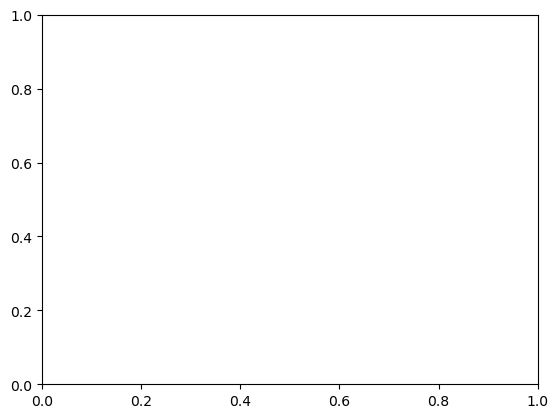

In [55]:
plt.plot(xpoints,pitching['WAR'])
plt.show()